In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
RT_EDC = np.load("data/RT-EDC-159.npy")
ISM_EDC = np.load("data/ISM-EDC-159.npy")

absorpt = [0.1, 0.5, 0.9]

In [3]:
print(RT_EDC.shape)
print(ISM_EDC.shape)

(200, 3)
(88201, 3)


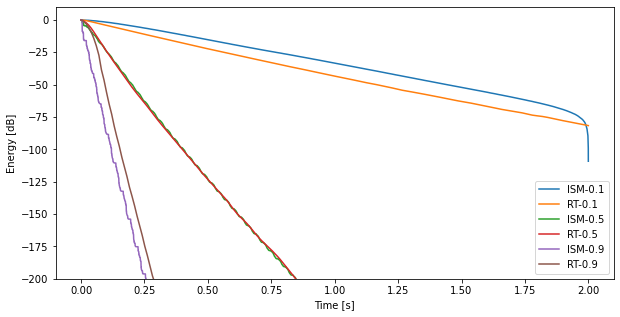

In [4]:
fs_ISM = 44100
fs_RT = 100
t0 = np.linspace(0, 2, ISM_EDC.shape[0])
t1 = np.linspace(0, 2, RT_EDC.shape[0])

plt.figure(figsize=(10, 5))
for x in range(RT_EDC.shape[1]):
    plt.plot(t0, ISM_EDC[:,x], label=f'ISM-{absorpt[x]}')
    plt.plot(t1, RT_EDC[:,x], label=f'RT-{absorpt[x]}')
    
plt.ylim(-200, 10)
plt.ylabel("Energy [dB]")
plt.legend()
plt.xlabel("Time [s]")
plt.savefig("compare-absorption.png")

In [5]:
def linear_fit(x, t0, t1, fs):
    x0 = int(t0 * fs)
    x1 = int(t1 * fs) + 1
    
    xp = np.linspace(t0, t1, x1-x0)
    z = np.polyfit(xp, x[x0:x1], 1)
    p = np.poly1d(z)
    
    #print(f"m: {z[0]:.3f} --> rt60: {-60 / z[0] * 1000:.0f}ms")
    
    return xp, z

def compute_rt60(energy, fs):
    kind = 20
    rt60_from = np.argmax(energy < -5)
    rt60_to = np.argmax(energy < -kind-5) + 1

    x = np.arange(energy.shape[0])
    xp = np.linspace(rt60_from, rt60_to, rt60_to - rt60_from)

    z = np.polyfit(xp, energy[rt60_from:rt60_to], 1)
    p = np.poly1d(z)
    
    rt60 = np.argmax(p(x) < -65)
    
    return ((rt60 - rt60_from) / fs) * 1000, rt60_from / fs

def deviation(x, y):
    return (x - y) / (x) * 100

RT60_ism = [compute_rt60(ISM_EDC[:,x], fs_ISM) for x in range(ISM_EDC.shape[1])]
RT60_rt = [compute_rt60(RT_EDC[:,x], fs_RT) for x in range(RT_EDC.shape[1])]

+------------+--------+---------+---------+
| alpha: 0.1 |   m    |  mRT60  |   RT60  |
+------------+--------+---------+---------+
|    ISM     | -37.43 | 1603.15 | 1646.03 |
|     RT     | -40.39 | 1485.64 | 1360.00 |
|    Dev%    | -7.91  |   7.33  |  17.38  |
+------------+--------+---------+---------+
+------------+---------+--------+--------+
| alpha: 0.5 |    m    | mRT60  |  RT60  |
+------------+---------+--------+--------+
|    ISM     | -259.85 | 230.91 | 245.94 |
|     RT     | -277.45 | 216.26 | 230.00 |
|    Dev%    |  -6.77  |  6.34  |  6.48  |
+------------+---------+--------+--------+
+------------+---------+-------+--------+
| alpha: 0.9 |    m    | mRT60 |  RT60  |
+------------+---------+-------+--------+
|    ISM     | -756.55 | 79.31 | 90.11  |
|     RT     | -802.09 | 74.81 | 150.00 |
|    Dev%    |  -6.02  |  5.68 | -66.46 |
+------------+---------+-------+--------+


Text(0.5, 1.0, 'alpha: 0.9')

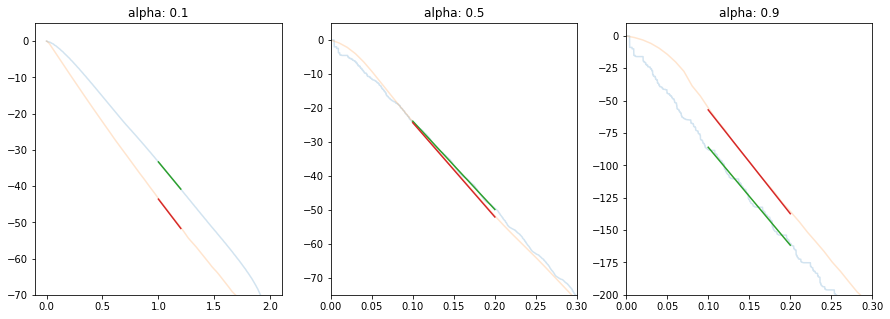

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

xp_ISM, z_ISM = linear_fit(ISM_EDC[:,0], 1.0, 1.2, fs_ISM)
xp_RT, z_RT = linear_fit(RT_EDC[:,0], 1.0, 1.2, fs_RT)
m_ism = z_ISM[0]
m_rt = z_RT[0]
m_frac = f"{deviation(m_ism, m_rt):0.2f}"
mRT60_ism = -60 / m_ism * 1000
mRT60_rt = -60 / m_rt * 1000
mRT60_frac = f"{deviation(mRT60_ism, mRT60_rt):0.2f}"
RT60_frac = f"{deviation(RT60_ism[0][0], RT60_rt[0][0]):0.2f}"

t = PrettyTable([f"alpha: {absorpt[0]}", 'm', 'mRT60', 'RT60'])
t.add_row(['ISM', m_ism, mRT60_ism, RT60_ism[0][0]])
t.add_row(['RT', m_rt, mRT60_rt, RT60_rt[0][0]])
t.add_row(['Dev%',m_frac, mRT60_frac, RT60_frac])
t.float_format = "0.2"
print(t)

axs[0].plot(t0, ISM_EDC[:,0], alpha=0.2, label='ISM')
axs[0].plot(t1, RT_EDC[:,0], alpha=0.2, label='RT')
axs[0].plot(xp_ISM, np.poly1d(z_ISM)(xp_ISM))
axs[0].plot(xp_RT, np.poly1d(z_RT)(xp_RT))
#axs[0].set_xlim(0.8, 1.4)
axs[0].set_ylim(-70, 5)
axs[0].set_title(f"alpha: {absorpt[0]}")

xp_ISM, z_ISM = linear_fit(ISM_EDC[:,1], 0.1, 0.2, fs_ISM)
xp_RT, z_RT = linear_fit(RT_EDC[:,1], 0.1, 0.2, fs_RT)
m_ism = z_ISM[0]
m_rt = z_RT[0]
m_frac = f"{deviation(m_ism, m_rt):0.2f}"
mRT60_ism = -60 / m_ism * 1000
mRT60_rt = -60 / m_rt * 1000
mRT60_frac = f"{deviation(mRT60_ism, mRT60_rt):0.2f}"
RT60_frac = f"{deviation(RT60_ism[1][0], RT60_rt[1][0]):0.2f}"

t = PrettyTable([f"alpha: {absorpt[1]}", 'm', 'mRT60', 'RT60'])
t.add_row(['ISM', m_ism, mRT60_ism, RT60_ism[1][0]])
t.add_row(['RT', m_rt, mRT60_rt, RT60_rt[1][0]])
t.add_row(['Dev%',m_frac, mRT60_frac, RT60_frac])
t.float_format = "0.2"
print(t)

axs[1].plot(t0, ISM_EDC[:,1], alpha=0.2, label='ISM')
axs[1].plot(t1, RT_EDC[:,1], alpha=0.2, label='RT')
axs[1].plot(xp_ISM, np.poly1d(z_ISM)(xp_ISM))
axs[1].plot(xp_RT, np.poly1d(z_RT)(xp_RT))
axs[1].set_xlim(0, 0.3)
axs[1].set_ylim(-75, 5)
axs[1].set_title(f"alpha: {absorpt[1]}")

xp_ISM, z_ISM = linear_fit(ISM_EDC[:,2], 0.1, 0.2, fs_ISM)
xp_RT, z_RT = linear_fit(RT_EDC[:,2], 0.1, 0.2, fs_RT)
m_ism = z_ISM[0]
m_rt = z_RT[0]
m_frac = f"{deviation(m_ism, m_rt):0.2f}"
mRT60_ism = -60 / m_ism * 1000
mRT60_rt = -60 / m_rt * 1000
mRT60_frac = f"{deviation(mRT60_ism, mRT60_rt):0.2f}"
RT60_frac = f"{deviation(RT60_ism[2][0], RT60_rt[2][0]):0.2f}"

t = PrettyTable([f"alpha: {absorpt[2]}", 'm', 'mRT60', 'RT60'])
t.add_row(['ISM', m_ism, mRT60_ism, RT60_ism[2][0]])
t.add_row(['RT', m_rt, mRT60_rt, RT60_rt[2][0]])
t.add_row(['Dev%',m_frac, mRT60_frac, RT60_frac])
t.float_format = "0.2"
print(t)

axs[2].plot(t0, ISM_EDC[:,2], alpha=0.2, label='ISM')
axs[2].plot(t1, RT_EDC[:,2], alpha=0.2, label='RT')
axs[2].plot(xp_ISM, np.poly1d(z_ISM)(xp_ISM))
axs[2].plot(xp_RT, np.poly1d(z_RT)(xp_RT))
axs[2].set_xlim(0, 0.3)
axs[2].set_ylim(-200, 10)
axs[2].set_title(f"alpha: {absorpt[2]}")



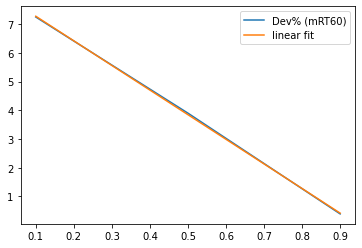

In [22]:
plt.plot([0.1, 0.5, 0.9], [7.25, 3.90, 0.39], label='Dev% (mRT60)')
plt.plot([0.1, 0.5, 0.9], np.poly1d(np.polyfit([0.1, 0.5, 0.9], [7.25, 3.90, 0.39], 1))([0.1, 0.5, 0.9]), label='linear fit')
plt.legend()